In [4]:
import numpy as np
import pandas as pd
from scipy.stats import linregress
from matplotlib import pyplot as plt
from scipy import stats


In [5]:
GDP_df=pd.read_csv('./data_sets/GDP_per_capita.csv')
GDP_df
CO2_df=pd.read_csv('./data_sets/CO2emission_percapita.csv')
CO2_df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,204.620372,208.822811,226.118079,214.800370,207.615777,185.203958,...,24.507516,13.157722,8.353561,8.410064,8.610374,8.426911,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.046057,0.053589,0.073721,0.074161,0.086174,0.101285,...,0.406424,0.345149,0.280455,0.253728,0.262556,0.245101,NaN,NaN,NaN,NaN
2,Angola,AGO,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.100835,0.082204,0.210531,0.202737,0.213560,0.205891,...,1.262825,1.361181,1.295075,1.664741,1.240245,1.202861,NaN,NaN,NaN,NaN
3,Albania,ALB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1.258195,1.374186,1.439956,1.181681,1.111742,1.166099,...,1.803715,1.697966,1.697279,1.900070,1.602648,1.577163,NaN,NaN,NaN,NaN
4,Andorra,AND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,5.867410,5.916884,5.901775,5.832906,5.969786,6.072370,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,4.672303,4.395272,4.441262,4.005283,4.702186,5.031520,NaN,NaN,NaN,NaN
260,"Yemen, Rep.",YEM,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.011038,0.013599,0.012729,0.014518,0.017550,0.017926,...,0.865783,0.764021,1.013754,0.955251,0.497091,0.390480,NaN,NaN,NaN,NaN
261,South Africa,ZAF,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,5.727221,5.832621,5.887170,5.961336,6.332342,6.616544,...,9.179457,8.794997,8.553336,8.882322,8.376655,8.480658,NaN,NaN,NaN,NaN
262,Zambia,ZMB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,0.946606,1.096876,...,0.208412,0.254267,0.265078,0.292412,0.285428,0.314183,NaN,NaN,NaN,NaN


In [6]:
GDP_summ_df=GDP_df[['Country Name','1990','1995','2000','2005','2010','2015']]
CO2_summ_df=CO2_df[['Country Name','1990','1995','2000','2005','2010','2015']]
data_df=GDP_summ_df.merge(CO2_summ_df,how='inner',on='Country Name',suffixes=("_GDP","_CO2"))
data_df.dropna(inplace=True)
data1990_df=data_df[['Country Name','1990_GDP','1990_CO2']]
data1995_df=data_df[['Country Name','1995_GDP','1995_CO2']]
data2000_df=data_df[['Country Name','2000_GDP','2000_CO2']]
data2005_df=data_df[['Country Name','2005_GDP','2005_CO2']]
data2010_df=data_df[['Country Name','2010_GDP','2010_CO2']]
data2015_df=data_df[['Country Name','2015_GDP','2015_CO2']]
data_df.describe()

,1990_GDP,1995_GDP,2000_GDP,2005_GDP,2010_GDP,2015_GDP,1990_CO2,1995_CO2,2000_CO2,2005_CO2,2010_CO2,2015_CO2
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,5219.904295,6616.724575,7139.456149,10493.939543,13475.746764,13977.895119,4.141247,4.269278,4.534401,4.801178,4.803088,4.541229
std,7947.209327,10118.817104,10682.724063,15761.964160,19054.788143,19294.641156,5.705641,6.748981,6.884621,6.933201,6.229748,5.732696
min,95.188250,134.342955,124.460800,151.681463,234.235647,305.549773,0.004218,0.004050,0.004078,0.004532,0.004832,0.004902
25%,553.586532,621.468527,614.945222,1009.248469,1550.496432,1991.872003,0.467930,0.537230,0.670393,0.808783,0.734844,0.890513
50%,1414.243760,1993.610272,1917.100392,3219.628799,5079.347465,5982.269083,1.604378,1.873439,2.087956,2.228124,2.450106,2.623659
75%,6050.814478,6627.132347,7675.788510,11532.684967,14894.963625,15396.658567,6.123723,5.908741,6.433103,7.084654,6.714604,6.219922
max,38428.385460,52831.252370,56284.168650,80289.696410,104965.306100,102005.625600,28.444624,61.913951,58.619465,58.881084,39.059708,41.642162


In [7]:
data1990_low_df=data1990_df[data1990_df['1990_GDP']<data1990_df['1990_GDP'].quantile(q=.33)]
data1990_mid_df=data1990_df[data1990_df['1990_GDP']<data1990_df['1990_GDP'].quantile(q=.66)]
data1990_high_df=data1990_df[data1990_df['1990_GDP']>data1990_df['1990_GDP'].quantile(q=.66)]
data1995_low_df=data1995_df[data1995_df['1995_GDP']<data1995_df['1995_GDP'].quantile(q=.33)]
data1995_mid_df=data1995_df[data1995_df['1995_GDP']<data1995_df['1995_GDP'].quantile(q=.66)]
data1995_high_df=data1995_df[data1995_df['1995_GDP']>data1995_df['1995_GDP'].quantile(q=.66)]
data2000_low_df=data2000_df[data2000_df['2000_GDP']<data2000_df['2000_GDP'].quantile(q=.33)]
data2000_mid_df=data2000_df[data2000_df['2000_GDP']<data2000_df['2000_GDP'].quantile(q=.66)]
data2000_high_df=data2000_df[data2000_df['2000_GDP']>data2000_df['2000_GDP'].quantile(q=.66)]
data2005_low_df=data2005_df[data2005_df['2005_GDP']<data2005_df['2005_GDP'].quantile(q=.33)]
data2005_mid_df=data2005_df[data2005_df['2005_GDP']<data2005_df['2005_GDP'].quantile(q=.66)]
data2005_high_df=data2005_df[data2005_df['2005_GDP']>data2005_df['2005_GDP'].quantile(q=.66)]
data2010_low_df=data2010_df[data2010_df['2010_GDP']<data2010_df['2010_GDP'].quantile(q=.33)]
data2010_mid_df=data2010_df[data2010_df['2010_GDP']<data2010_df['2010_GDP'].quantile(q=.66)]
data2010_high_df=data2010_df[data2010_df['2010_GDP']>data2010_df['2010_GDP'].quantile(q=.66)]
data2015_low_df=data2015_df[data2015_df['2015_GDP']<data2015_df['2015_GDP'].quantile(q=.33)]
data2015_mid_df=data2015_df[data2015_df['2015_GDP']<data2015_df['2015_GDP'].quantile(q=.66)]
data2015_high_df=data2015_df[data2015_df['2015_GDP']>data2015_df['2015_GDP'].quantile(q=.66)]

data_low_df=pd.merge(data1990_low_df,data1995_low_df,on='Country Name',how='inner')
data_low_df=pd.merge(data_low_df,data2000_low_df,on='Country Name',how='inner')
data_low_df=pd.merge(data_low_df,data2005_low_df,on='Country Name',how='inner')
data_low_df=pd.merge(data_low_df,data2010_low_df,on='Country Name',how='inner')
data_low_df=pd.merge(data_low_df,data2015_low_df,on='Country Name',how='inner')

data_mid_df=pd.merge(data1990_mid_df,data1995_mid_df,on='Country Name',how='inner')
data_mid_df=pd.merge(data_mid_df,data2000_mid_df,on='Country Name',how='inner')
data_mid_df=pd.merge(data_mid_df,data2005_mid_df,on='Country Name',how='inner')
data_mid_df=pd.merge(data_mid_df,data2010_mid_df,on='Country Name',how='inner')
data_mid_df=pd.merge(data_mid_df,data2015_mid_df,on='Country Name',how='inner')

data_high_df=pd.merge(data1990_high_df,data1995_high_df,on='Country Name',how='inner')
data_high_df=pd.merge(data_high_df,data2000_high_df,on='Country Name',how='inner')
data_high_df=pd.merge(data_high_df,data2005_high_df,on='Country Name',how='inner')
data_high_df=pd.merge(data_high_df,data2010_high_df,on='Country Name',how='inner')
data_high_df=pd.merge(data_high_df,data2015_high_df,on='Country Name',how='inner')



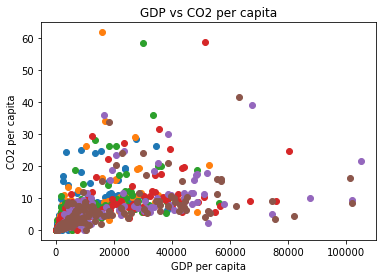

In [8]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(data_df['1990_GDP'],data_df['1990_CO2'])
ax1.scatter(data_df['1995_GDP'],data_df['1995_CO2'])
ax1.scatter(data_df['2000_GDP'],data_df['2000_CO2'])
ax1.scatter(data_df['2005_GDP'],data_df['2005_CO2'])
ax1.scatter(data_df['2010_GDP'],data_df['2010_CO2'])
ax1.scatter(data_df['2015_GDP'],data_df['2015_CO2'])
plt.xlabel('GDP per capita')
plt.ylabel('CO2 per capita')
plt.title('GDP vs CO2 per capita')
plt.savefig('WW-GDPvCO2.png')

R-squared: 0.448824


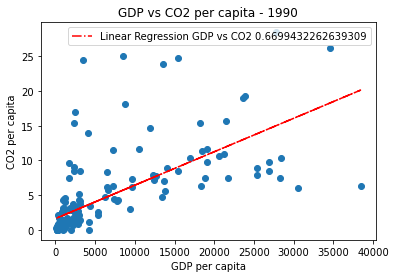

In [12]:
x=data_df['1990_GDP']
y=data_df['1990_CO2']

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel,'r-.')
plt.legend([f'Linear Regression GDP vs CO2 {r}'])
plt.title('GDP vs CO2 per capita - 1990')
plt.xlabel('GDP per capita')
plt.ylabel('CO2 per capita')
plt.savefig('1990-GDPvCO2.png')
res = stats.linregress(x, y)
print(f"R-squared: {res.rvalue**2:.6f}")
plt.show() 


R-squared: 0.327706


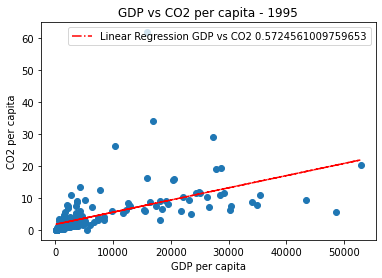

In [33]:
x=data_df['1995_GDP']
y=data_df['1995_CO2']

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel,'r-.')
plt.legend([f'Linear Regression GDP vs CO2 {r}'])
plt.title('GDP vs CO2 per capita - 1995')
plt.xlabel('GDP per capita')
plt.ylabel('CO2 per capita')
res = stats.linregress(x, y)
print(f"R-squared: {res.rvalue**2:.6f}")
plt.savefig('1995-GDPvCO2.png')
plt.show() 

R-squared: 0.433795


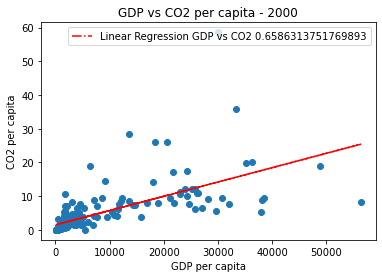

In [34]:
x=data_df['2000_GDP']
y=data_df['2000_CO2']

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel,'r-.')
plt.legend([f'Linear Regression GDP vs CO2 {r}'])
plt.title('GDP vs CO2 per capita - 2000')
plt.xlabel('GDP per capita')
plt.ylabel('CO2 per capita')
res = stats.linregress(x, y)
print(f"R-squared: {res.rvalue**2:.6f}")
plt.savefig('2000-GDPvCO2.png')
plt.show() 

R-squared: 0.430686


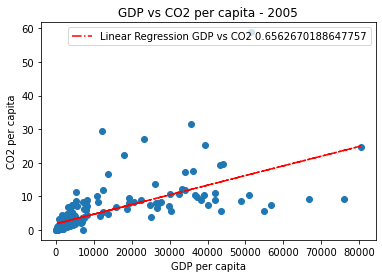

In [35]:
x=data_df['2005_GDP']
y=data_df['2005_CO2']

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel,'r-.')
plt.legend([f'Linear Regression GDP vs CO2 {r}'])
plt.title('GDP vs CO2 per capita - 2005')
plt.xlabel('GDP per capita')
plt.ylabel('CO2 per capita')
res = stats.linregress(x, y)
print(f"R-squared: {res.rvalue**2:.6f}")
plt.savefig('2005-GDPvCO2.png')
plt.show() 

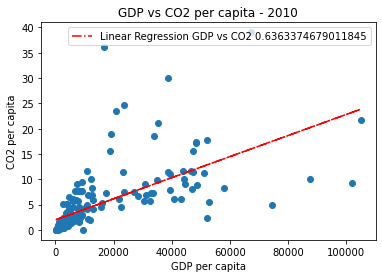

In [10]:
x=data_df['2010_GDP']
y=data_df['2010_CO2']

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel,'r-.')
plt.legend([f'Linear Regression GDP vs CO2 {r}'])
plt.title('GDP vs CO2 per capita - 2010')
plt.xlabel('GDP per capita')
plt.ylabel('CO2 per capita')
plt.savefig('2010-GDPvCO2.png')
plt.show() 

R-squared: 0.334055


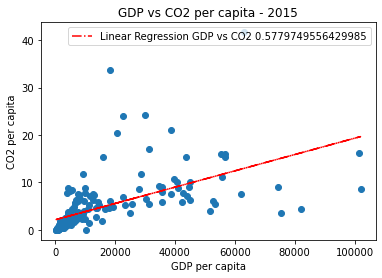

In [36]:
x=data_df['2015_GDP']
y=data_df['2015_CO2']

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel,'r-.')
plt.legend([f'Linear Regression GDP vs CO2 {r}'])
plt.title('GDP vs CO2 per capita - 2015')
plt.xlabel('GDP per capita')
plt.ylabel('CO2 per capita')
res = stats.linregress(x, y)
print(f"R-squared: {res.rvalue**2:.6f}")
plt.savefig('2015-GDPvCO2.png')
plt.show()

In [12]:
test_df=data_df

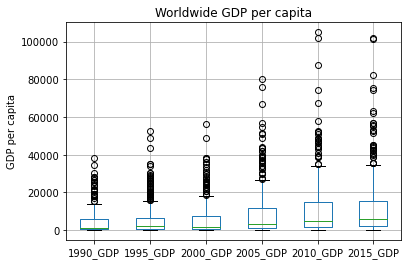

In [30]:
GDP_df=test_df.iloc[:,0:7]
GDP_df.boxplot()
plt.ylabel('GDP per capita')
plt.savefig('Worldwide GPD per capita.png')
plt.title('Worldwide GDP per capita')

plt.savefig('Worldwide GPD per capita.png')

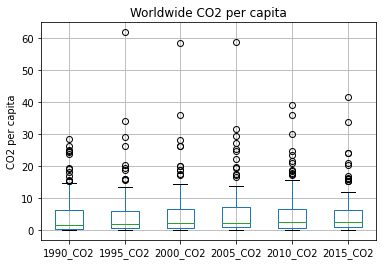

In [25]:
CO2_df=test_df.iloc[:,-6:]
CO2_df.boxplot()
plt.ylabel('CO2 per capita')
plt.title('Worldwide CO2 per capita')
plt.savefig('Worldwide CO2 per capita.png')

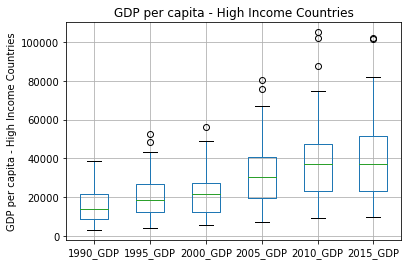

In [19]:
GDP_high_df=data_high_df.iloc[:,[1,3,5,7,9,11]]
GDP_high_df.boxplot()
plt.ylabel('GDP per capita - High Income Countries')
plt.title('GDP per capita - High Income Countries')
plt.savefig('High Income Countries GDP per capita.png')

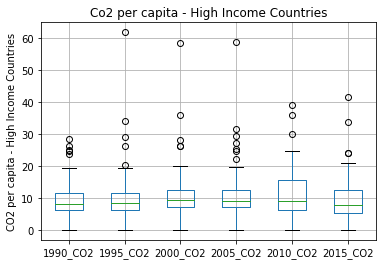

In [20]:
CO2_high_df=data_high_df.iloc[:,[2,4,6,8,10,12]]
CO2_high_df.boxplot()
plt.ylabel('CO2 per capita - High Income Countries')
plt.title('Co2 per capita - High Income Countries')
plt.savefig('High Income Countries CO2 per capita.png')

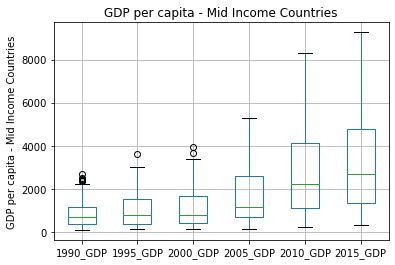

In [21]:
GDP_mid_df=data_mid_df.iloc[:,[1,3,5,7,9,11]]
GDP_mid_df.boxplot()
plt.ylabel('GDP per capita - Mid Income Countries')
plt.title('GDP per capita - Mid Income Countries')
plt.savefig('Mid Income Countries GDP per capita.png')

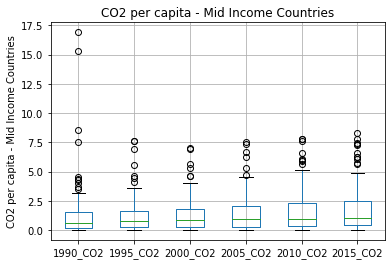

In [22]:
CO2_mid_df=data_mid_df.iloc[:,[2,4,6,8,10,12]]
CO2_mid_df.boxplot()
plt.ylabel('CO2 per capita - Mid Income Countries')
plt.title('CO2 per capita - Mid Income Countries')
plt.savefig('Mid Income Countries CO2 per capita.png')

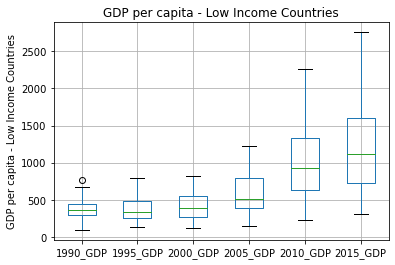

In [23]:
GDP_low_df=data_low_df.iloc[:,[1,3,5,7,9,11]]
GDP_low_df.boxplot()
plt.ylabel('GDP per capita - Low Income Countries')
plt.title('GDP per capita - Low Income Countries')
plt.savefig('Low Income Countries GDP per capita.png')

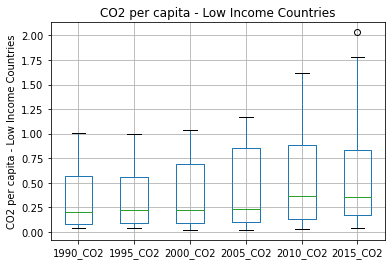

In [24]:
CO2_low_df=data_low_df.iloc[:,[2,4,6,8,10,12]]
CO2_low_df.boxplot()
plt.ylabel('CO2 per capita - Low Income Countries')
plt.title('CO2 per capita - Low Income Countries')
plt.savefig('Low Income Countries CO2 per capita.png')

In [27]:
CO2_low_df.describe()

,1990_CO2,1995_CO2,2000_CO2,2005_CO2,2010_CO2,2015_CO2
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,0.327413,0.348598,0.382769,0.423978,0.493822,0.566799
std,0.295648,0.304687,0.334392,0.374582,0.430236,0.516470
min,0.038430,0.039812,0.019306,0.020912,0.031295,0.037226
25%,0.084427,0.095215,0.092017,0.096333,0.133995,0.176367
50%,0.206110,0.225187,0.224638,0.237842,0.367017,0.357743
75%,0.566403,0.563289,0.690440,0.857878,0.881998,0.835275
max,1.006510,0.998337,1.037689,1.170708,1.622619,2.032108


In [28]:
CO2_mid_df.describe()

,1990_CO2,1995_CO2,2000_CO2,2005_CO2,2010_CO2,2015_CO2
count,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000
mean,1.379592,1.267917,1.288327,1.476254,1.677591,1.815962
std,2.428215,1.527399,1.435474,1.635560,1.857041,1.973576
min,0.028151,0.039812,0.019306,0.020912,0.031295,0.037226
25%,0.232542,0.258432,0.301095,0.282228,0.394116,0.420401
50%,0.630676,0.787033,0.848961,0.950345,0.974343,1.017131
75%,1.516886,1.680356,1.832232,2.037302,2.350965,2.486064
max,16.912900,7.656171,7.070264,7.534817,7.768594,8.282075


In [29]:
CO2_high_df.describe()

,1990_CO2,1995_CO2,2000_CO2,2005_CO2,2010_CO2,2015_CO2
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,10.236336,11.067641,11.960344,12.178284,11.593318,10.375074
std,6.559958,9.765677,9.551270,9.547614,8.106313,7.769921
min,0.004218,0.004050,0.004078,0.004532,0.004832,0.004902
25%,6.217451,6.183099,7.206110,7.254134,6.157045,5.415069
50%,8.152413,8.561012,9.360240,9.035636,9.095621,7.838113
75%,11.600431,11.674470,12.660825,12.501549,15.526801,12.612664
max,28.444624,61.913951,58.619465,58.881084,39.059708,41.642162


In [37]:
GDP_high_df.describe()

,1990_GDP,1995_GDP,2000_GDP,2005_GDP,2010_GDP,2015_GDP
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,15999.599514,20332.937593,21875.585468,32166.985607,38923.987292,39706.785273
std,8576.267276,10932.947199,11044.398391,16481.941164,20899.888063,21212.414116
min,3112.268706,3928.223926,5499.151004,7298.622445,9271.398233,9616.645006
25%,8728.219255,12483.180148,12203.483605,19359.133265,23406.258360,23158.815845
50%,13926.491535,18821.232740,21766.747320,30233.252270,36923.525695,37196.395170
75%,21506.518875,26810.727970,27360.675610,40544.456652,47680.181595,51800.220003
max,38428.385460,52831.252370,56284.168650,80289.696410,104965.306100,102005.625600


In [38]:
GDP_mid_df.describe()

,1990_GDP,1995_GDP,2000_GDP,2005_GDP,2010_GDP,2015_GDP
count,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000
mean,876.651090,1040.538823,1103.035689,1680.117265,2800.302370,3257.021396
std,633.162669,806.274883,851.382093,1303.626900,2141.592429,2418.776880
min,95.188250,134.342955,124.460800,151.681463,234.235647,305.549773
25%,380.276809,369.830697,437.521150,676.600838,1106.640298,1332.193183
50%,697.539573,773.262861,811.533974,1162.290113,2207.772111,2679.345589
75%,1169.526671,1554.093212,1661.756446,2587.209065,4118.163344,4790.379972
max,2703.168039,3599.555202,3929.075495,5282.906022,8289.802434,9260.447303


In [39]:
GDP_low_df.describe()

,1990_GDP,1995_GDP,2000_GDP,2005_GDP,2010_GDP,2015_GDP
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,385.452993,368.944695,412.772666,605.253281,1003.767889,1209.588683
std,147.229899,162.609985,184.011460,277.563108,469.415088,611.117860
min,95.188250,134.342955,124.460800,151.681463,234.235647,305.549773
25%,302.589843,261.307638,267.870603,388.233622,638.379985,728.786984
50%,360.591665,337.766463,393.787992,505.539181,922.128341,1115.995378
75%,449.163437,488.553198,557.301747,791.807067,1336.905816,1602.929739
max,766.140955,789.551769,816.871301,1228.441824,2258.183141,2752.664208


In [43]:
GDP_mid_df.head(20)

,1990_GDP,1995_GDP,2000_GDP,2005_GDP,2010_GDP,2015_GDP
0,947.704182,397.179451,556.836318,1902.422346,3587.883798,4166.979684
1,617.230435,750.604449,1126.683318,2673.787283,4094.350334,3952.801215
2,2009.415136,2072.744553,2605.633263,3765.918161,5926.712963,6400.360350
3,208.146755,167.098916,136.463971,151.681463,234.235647,305.549773
4,393.686214,367.387341,511.400227,822.457831,1036.533952,1076.797716
5,351.979323,235.832197,254.717529,457.933601,647.835847,653.326979
6,306.268704,329.424085,418.068968,499.461940,781.153594,1248.453398
7,2366.529821,2258.286018,1621.242961,3899.907638,6812.406338,7055.935673
8,2197.185023,2996.382928,3364.332936,3883.192389,4270.864345,4775.955648
9,709.059672,880.992224,997.582460,1034.311240,1955.461544,3035.972214
